This notebook follows from the file `big_1_3_analyse_the_annual_ts.py`.
# Read the data

In [1]:
import h5py
import numpy as np

# alpha = 90, 75, 50, 25, 10
alpha = 90
filename = r"C:\SUSTech\datasets_of_graduation_project\big_outputs\hetero_of_temp\slopes_of_2mtemp_annual" + str(alpha) + "th.h5"

with h5py.File(filename, 'r') as f:
    LATS = f['latitudes'][:]
    LONS = f['longitudes'][:]
    slopes = f['slopes'][:]
    
print("The shape of slopes is: (len(LATS), len(LONS)) = ({}, {})".format(len(LATS), len(LONS)))

The shape of slopes is: (len(LATS), len(LONS)) = (47, 144)


# Visualizations

In [2]:
slopes

array([[-0.00195138, -0.00195138, -0.00195138, ..., -0.00195138,
        -0.00195138, -0.00195138],
       [-0.00214453, -0.0020927 , -0.00205341, ..., -0.00228586,
        -0.00223428, -0.0021496 ],
       [-0.00226311, -0.00214255, -0.00212443, ..., -0.00205614,
        -0.00215419, -0.0022577 ],
       ...,
       [ 0.02826827,  0.03509252,  0.0485846 , ...,  0.03084504,
         0.02983907,  0.027585  ],
       [ 0.03180814,  0.03822808,  0.04052643, ...,  0.03332637,
         0.03373883,  0.03176956],
       [ 0.03882758,  0.03500937,  0.03315322, ...,  0.03775371,
         0.03794602,  0.03801242]], dtype=float32)

The min and max of slopes are:  -0.0074658077 0.17878014


C:\Users\15523\AppData\Local\Temp\ipykernel_20380\1334665308.py:25: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = m.pcolormesh(x, y, slopes, cmap="coolwarm", norm=norm, shading="auto")


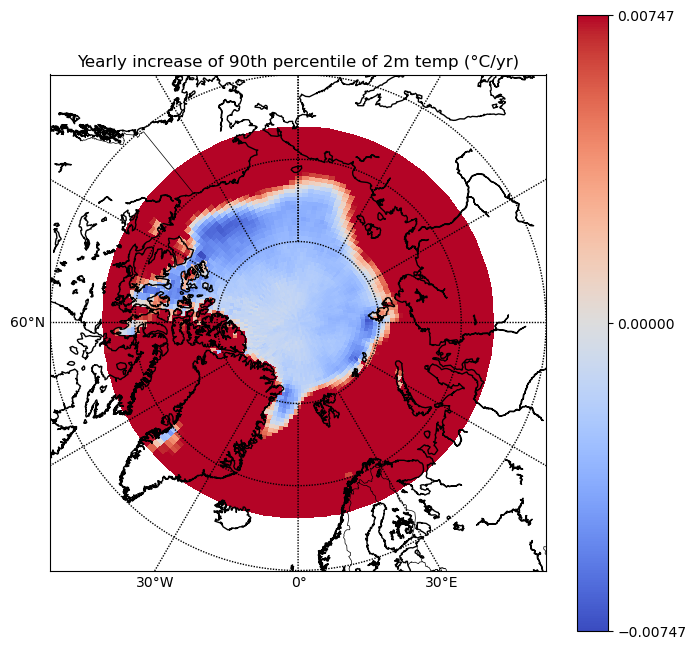

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors  # 颜色归一化

# 生成规则网格数据（LATS, LONS 笛卡尔积）
lons, lats = np.meshgrid(LONS, LATS)  # 生成规则网格

slope_min, slope_max = np.min(slopes.flatten()), np.max(slopes.flatten())
print("The min and max of slopes are: ", slope_min, slope_max)

# 创建北极投影地图
fig, ax = plt.subplots(figsize=(8, 8))
m = Basemap(projection="npstere", boundinglat=60, lon_0=0, resolution="l", ax=ax)

# 转换网格点到投影坐标（Basemap 需要 x, y 坐标）
x, y = m(lons, lats)

# slope_abs_max = max(abs(slope_min), abs(slope_max))
# norm = mcolors.Normalize(vmin=-slope_abs_max, vmax=slope_abs_max)  # 颜色归一化
slope_abs_min = min(abs(slope_min), abs(slope_max))
norm = mcolors.Normalize(vmin=-slope_abs_min, vmax=slope_abs_min)  # 颜色归一化

# 绘制热力图
c = m.pcolormesh(x, y, slopes, cmap="coolwarm", norm=norm, shading="auto")

# 绘制地图元素
m.drawcoastlines()
m.drawcountries()
m.drawparallels(np.arange(60, 91, 10), labels=[True, True, False, False])
m.drawmeridians(np.arange(-180, 181, 30), labels=[False, False, False, True])

# 添加颜色条，并设置范围
cb = plt.colorbar(c)
# cb.set_ticks([-slope_abs_max, 0, slope_abs_max])
cb.set_ticks([-slope_abs_min, 0, slope_abs_min])

# 标题
plt.title("Yearly increase of " + str(alpha) + "th percentile of 2m temp (°C/yr)")
plt.show()

fig.savefig("fig_outputs/heatmap_of_2mtemp_annual" + str(alpha) + ".png", dpi=300)